## Below the rough outlines for the datacluster 
In this notebook the first attempt to make a dataset that is dynamic in time is made.
The data set has to be dynamic in the way that over time the chance that a certain datapoint pops up in a cluster shifts between the clusters. 

#### import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import seaborn as sns
import scipy as sp
%matplotlib inline


Make first a X amount of clusters in the 2d space to generate strong clusters.

In [49]:
def cluster_centers(N_clusters):
    coordinates = []
    for i in range(N_clusters):
        x = np.random.uniform(0,1000)
        y = np.random.uniform(0,1000)
        coordinates.append([np.int(i), x,y])
    coordinates = np.array(coordinates)
    return coordinates

Make now the clusters so that we can later on draw randomly in time from them

In [77]:
def cluster_creation(centers, cluster_size):
    cluster_coordinates = []
    for i, center in enumerate(centers):
        sig_x = abs(np.random.normal(10, 3))
        sig_y = abs(np.random.normal(10, 3))
        for r in range(cluster_size):
            x = np.random.normal(center[1], sig_x)
            y = np.random.normal(center[2], sig_y)
            cluster_coordinates.append({'cluster_name':i,'x':x, 'y':y})
    return cluster_coordinates

# now we will create a function that puts out which cluster is detected in time
def p_time_sin(n_clusters, centers, dt):
    p_t = []
    clusters_in_time = []
    for t in np.arange(0, 10, dt):
        chance = []
        for i in range(len(centers.T[0])):
            chance.append(np.sin((np.pi / n_clusters) * (t + i)) ** 2)
        p = chance / sum(chance)
        p_t.append(p)
        sig_x = abs(np.random.normal(10, 3))
        sig_y = abs(np.random.normal(10, 3))
        cluster_num = int(np.random.choice(centers.T[0], p=p))
        x = np.random.normal(centers[cluster_num][1], sig_x)
        y = np.random.normal(centers[cluster_num][2], sig_y)
        clusters_in_time.append({'time': t, 'cluster_name': cluster_num, 'x': x, 'y': y})
    return p_t, clusters_in_time

# keeps track of the 
def p_time_poiss(N_clusters, centers, dt):
    p_t = []
    clusters_in_time = []
    for t in np.arange(0,20, dt):
        chances = sp.stats.poisson.pmf(centers.T[0], t)
        p = chances/sum(chances)
        p_t.append(p)
        sig_x = abs(np.random.normal(10, 3))
        sig_y = abs(np.random.normal(10, 3))
        cluster_num = int(np.random.choice(centers.T[0], p=p))
        x = np.random.normal(centers[cluster_num][1], sig_x)
        y = np.random.normal(centers[cluster_num][2], sig_y)
        clusters_in_time.append({'time':t, 'cluster_name':cluster_num, 'x':x, 'y':y})
    return p_t, clusters_in_time

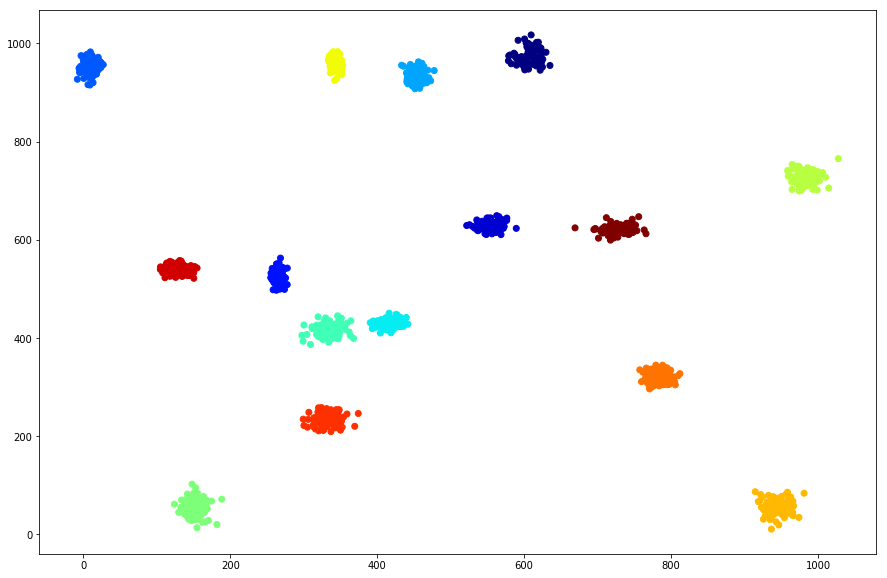

In [78]:
N_clusters = 15
cluster_size = 100
centers = cluster_centers(N_clusters)
cluster_coord = cluster_creation(centers, cluster_size=cluster_size)

df = pd.DataFrame(cluster_coord)
plt.figure(figsize=(15,10))
plt.scatter(df.x, df.y, c=df.cluster_name, cmap = 'jet')


time_clusters = p_time_sin(N_clusters, centers, 0.001)[1]

In [79]:
df_tmp1 = pd.DataFrame(time_clusters)
df_tmp1

,cluster_name,time,x,y
0,7,0.000,160.507905,51.669344
1,8,0.001,992.609296,727.317307
2,6,0.002,338.214736,397.310043
3,8,0.003,979.918335,737.652794
4,5,0.004,421.868391,414.494112
5,11,0.005,775.587391,315.628745
6,7,0.006,149.653643,61.095824
7,9,0.007,347.821525,964.287565
8,6,0.008,332.954818,430.582448
9,5,0.009,413.269763,425.204513


KeyboardInterrupt: 

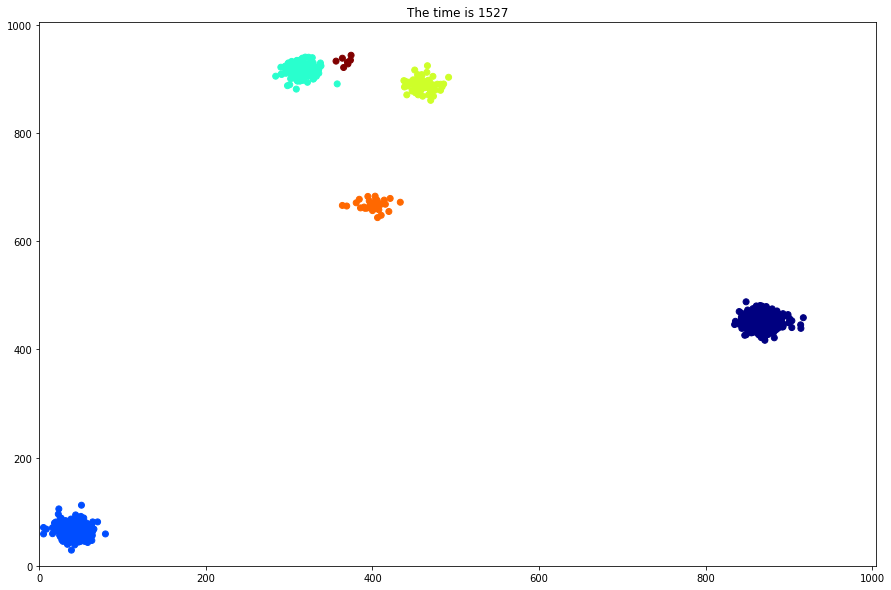

In [74]:

for i in range(2000):
    plt.figure(figsize=(15,10))
    df_tmp = df_tmp1[0:i]
    plt.scatter(df_tmp.x, df_tmp.y, c=df_tmp.cluster_name, cmap='jet')
    plt.xlim(0,1005)
    plt.ylim(0,1005)
    plt.title('The time is %i'%i)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.001)
    plt.close()

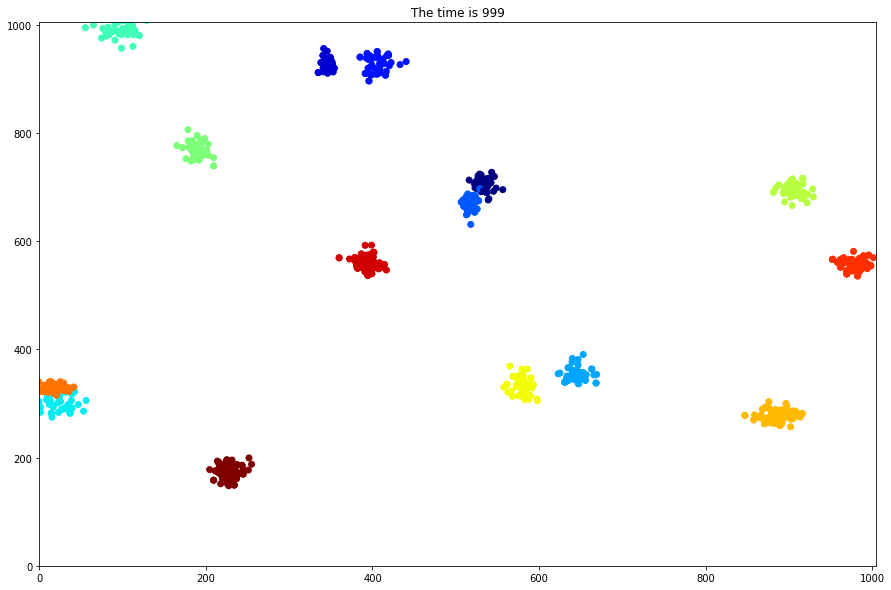

In [5]:
df_tmp = pd.DataFrame()

steps = 20
for i in range(1000):
    plt.figure(figsize=(15,10))
    df_tmp = df_tmp.append(df[df['cluster_name'] == time_clusters[i*steps][1]].sample(), ignore_index=True)
    plt.scatter(df_tmp.x, df_tmp.y, c=df_tmp.cluster_name, cmap='jet')
    plt.xlim(0,1005)
    plt.ylim(0,1005)
    plt.title('The time is %i'%i)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.001)
    plt.close()

,cluster_name,x,y
0,0,528.784519,705.820744
1,0,525.057061,697.050860
2,0,528.675596,724.185279
3,0,542.189049,717.948465
4,0,538.970245,676.347906
5,0,535.169455,714.520870
6,0,533.665075,693.311136
7,0,530.704442,691.729049
8,1,344.187134,916.490786
9,1,349.154847,938.509221


In [8]:
sliders = ['sin', 'pois']
assert('poiss' in sliders)

AssertionError: 

In [15]:
slider = 'hoi'
list_sliders = ['sin', 'poisson']
assert slider in list_sliders, 'Wrong type of slider choose from the list: {}'.format(list_sliders) 

AssertionError: Wrong type of slider choose from the list: ['sin', 'poisson']